In [2]:
cd

C:\Users\ALOK


In [38]:
import pandas as pd
import numpy as np


In [39]:
df=pd.read_csv(r"C:\Users\ALOK\Desktop\verz_project\country_data.csv")

In [40]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [41]:
df.shape

(167, 10)

In [42]:
df_description=pd.read_csv(r"C:\Users\ALOK\Desktop\verz_project\data-dictionary+.csv")
df_description


,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Observations
## There is no null value so there is no need to exempt any data row and now we can proceed for K-Mean clustering.

In [44]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [45]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


## BOX PLOT

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x2180ae6ac88>,
 'caps': [<matplotlib.lines.Line2D at 0x2180ae772b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2180ae6ab38>],
 'medians': [<matplotlib.lines.Line2D at 0x2180ae779b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2180ae77d30>],
 'means': []}

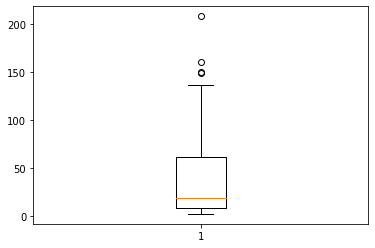

In [48]:
plt.boxplot(df.child_mort)

{'whiskers': [<matplotlib.lines.Line2D at 0x2180aec4c18>,
 'caps': [<matplotlib.lines.Line2D at 0x2180aecf240>,
 'boxes': [<matplotlib.lines.Line2D at 0x2180aec4ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x2180aecf940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2180aecfcc0>],
 'means': []}

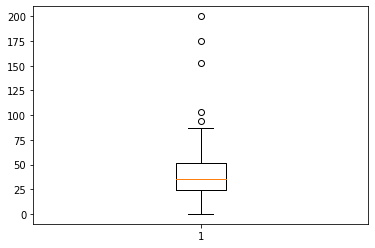

In [49]:
plt.boxplot(df.exports)

{'whiskers': [<matplotlib.lines.Line2D at 0x2180af34320>,
 'caps': [<matplotlib.lines.Line2D at 0x2180af34908>,
 'boxes': [<matplotlib.lines.Line2D at 0x2180af341d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2180af34f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x2180af3e748>],
 'means': [<matplotlib.lines.Line2D at 0x2180af3e3c8>]}

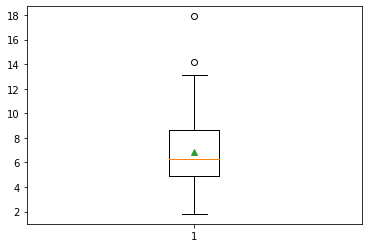

In [50]:
plt.boxplot(df.health,showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2180af90d68>,
 'caps': [<matplotlib.lines.Line2D at 0x2180af9f390>,
 'boxes': [<matplotlib.lines.Line2D at 0x2180af90c18>],
 'medians': [<matplotlib.lines.Line2D at 0x2180af9fa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2180afaa1d0>],
 'means': [<matplotlib.lines.Line2D at 0x2180af9fe10>]}

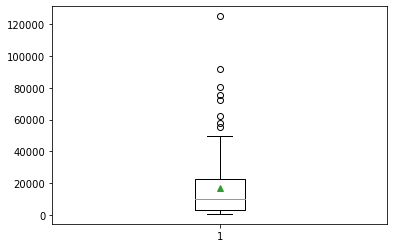

In [51]:
plt.boxplot(df.income,showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2180aff8c88>,
 'caps': [<matplotlib.lines.Line2D at 0x2180b0032b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2180aff8b38>],
 'medians': [<matplotlib.lines.Line2D at 0x2180b0039b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2180b00e0f0>],
 'means': [<matplotlib.lines.Line2D at 0x2180b003d30>]}

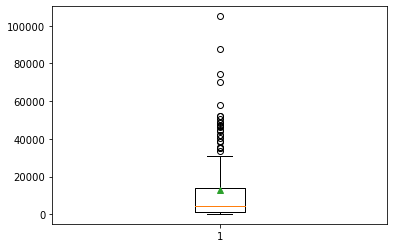

In [52]:
plt.boxplot(df.gdpp,showmeans=True)

# Observation
## 1. gdpp boxplot gives the inference that gdp of the countries have  many outlier but it has the utmost importance in decidind the developability of the country so we will not eliminate it here, it can affect  our result adversely so will eliminate in outlier treatment.





# Univariate Analysis and bivariate analysis

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

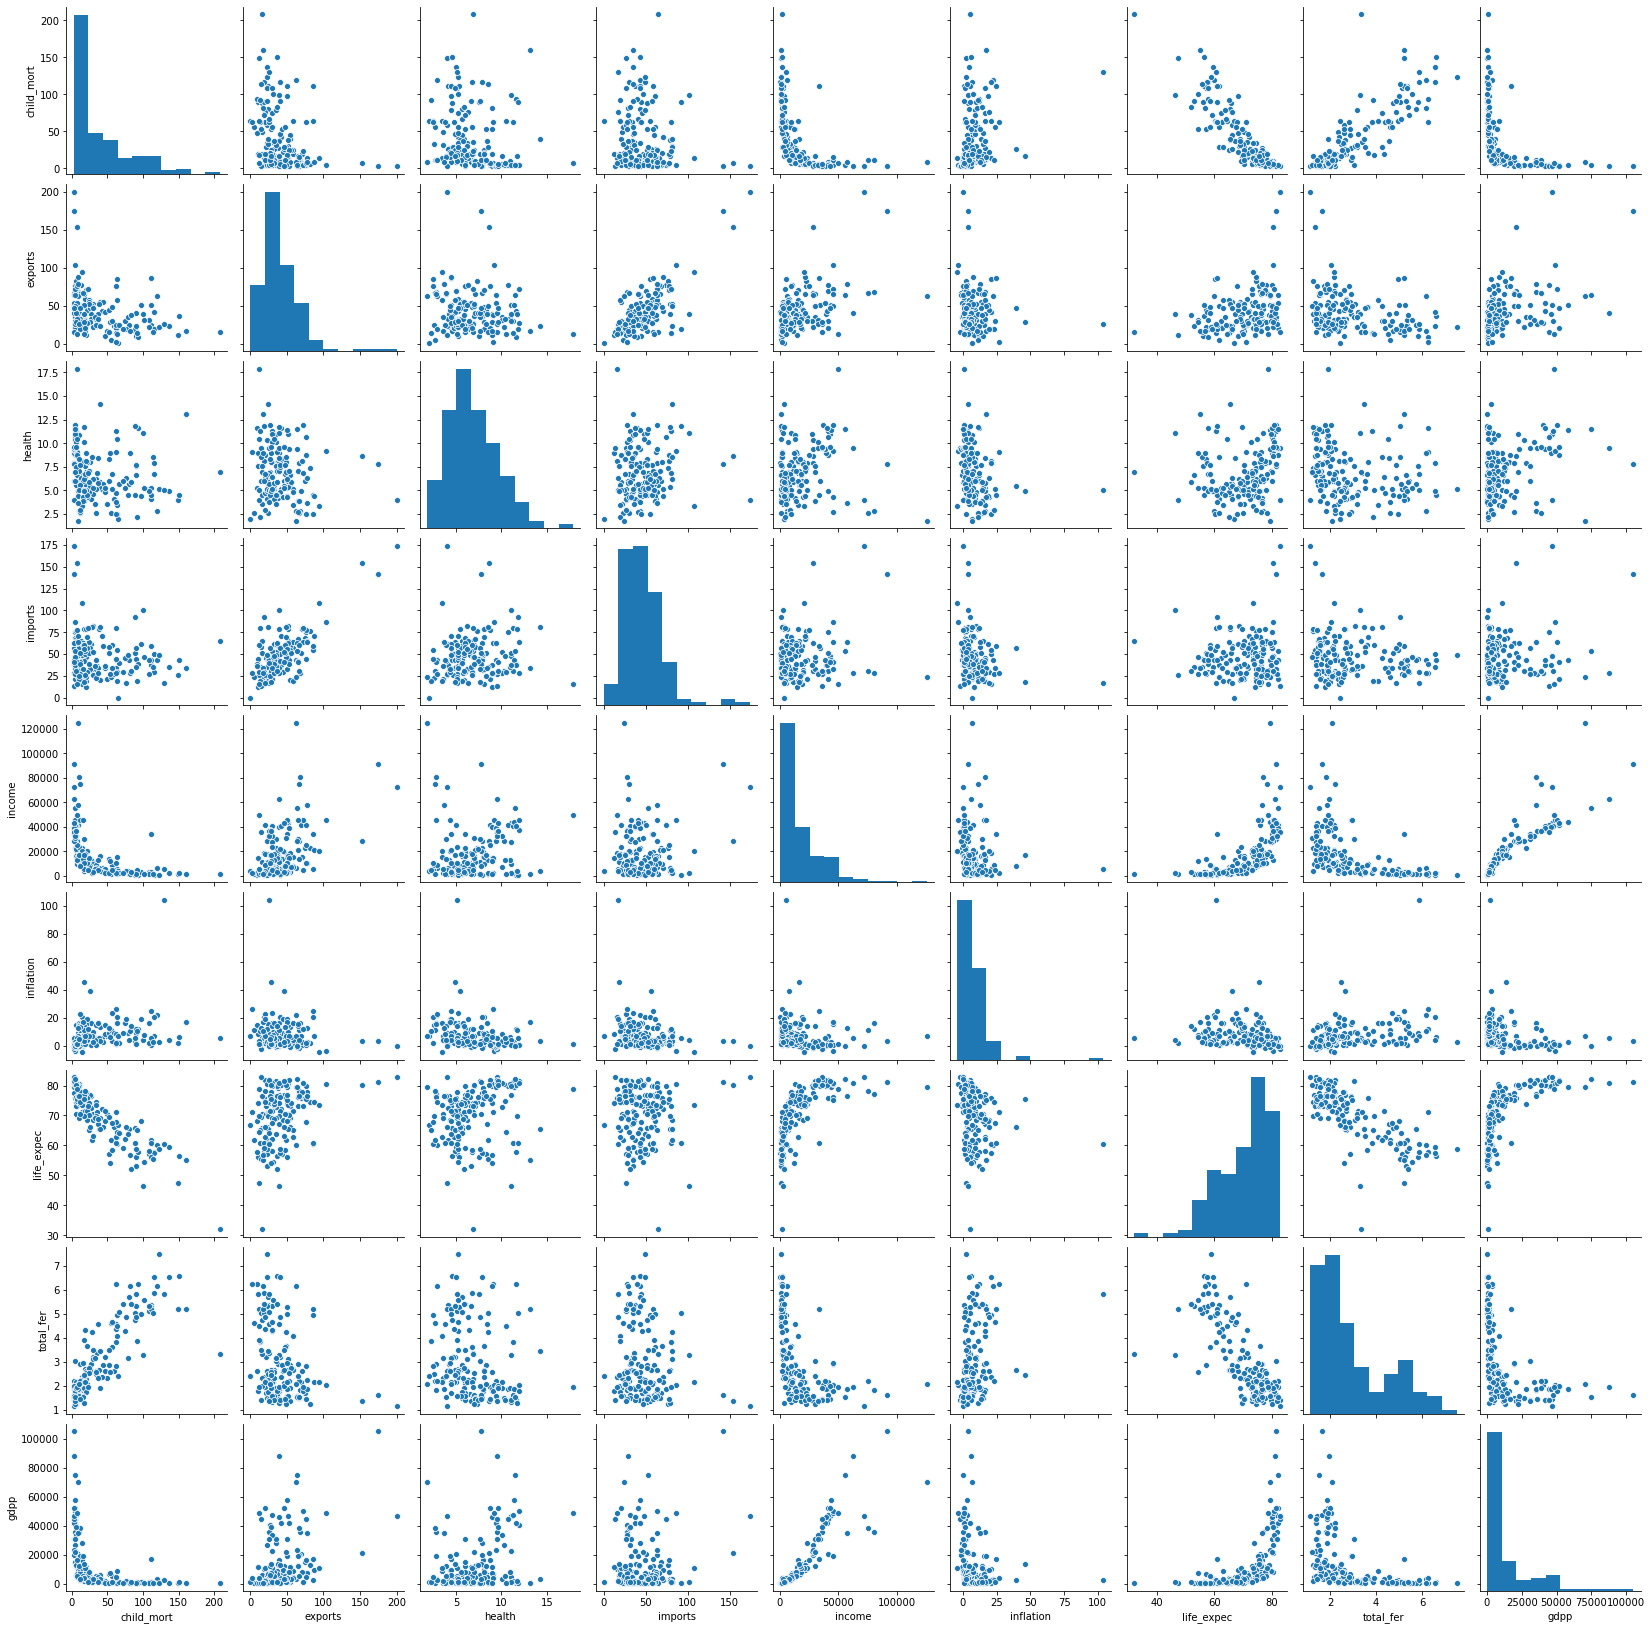

In [53]:
import seaborn as sns
%matplotlib inline
data_stat=df.describe()
print(data_stat)
sns.pairplot(df)

# Observations
## 1. Higher the income , higher is the gdp, higher the life expectancy.
##   i.e people in higher income countries tend to live longer.
## 2.Higher the income lower the child mortality.
## 3. Lower the inflation tend to good health.


# Data cleaning

In [59]:
# Converting exports,imports and health spending percentages to absolute values.

df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [60]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,305.809,231.803222,1373.08241,1610,9.44,56.2,5.82,553
1,Albania,16.6,46838.680,10956.905500,81298.56600,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,76383.744,8294.797200,62459.62400,12900,16.10,76.5,2.89,4460
3,Angola,119.0,77631.407,3551.356500,53457.26100,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,677222.000,89750.520000,876667.60000,19100,1.44,76.8,2.13,12200


In [61]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

## dropdown country col as it is object type

In [62]:
df_country_drop = df.copy()
country = df_country_drop.pop('country')

In [63]:
df_country_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,305.809,231.803222,1373.08241,1610,9.44,56.2,5.82,553
1,16.6,46838.680,10956.905500,81298.56600,9930,4.49,76.3,1.65,4090
2,27.3,76383.744,8294.797200,62459.62400,12900,16.10,76.5,2.89,4460
3,119.0,77631.407,3551.356500,53457.26100,5900,22.40,60.1,6.16,3530
4,10.3,677222.000,89750.520000,876667.60000,19100,1.44,76.8,2.13,12200


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_country_drop)
df_country_drop

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,305.809,231.803222,1373.08241,1610,9.44,56.2,5.82,553
1,16.6,46838.680,10956.905500,81298.56600,9930,4.49,76.3,1.65,4090
2,27.3,76383.744,8294.797200,62459.62400,12900,16.10,76.5,2.89,4460
3,119.0,77631.407,3551.356500,53457.26100,5900,22.40,60.1,6.16,3530
4,10.3,677222.000,89750.520000,876667.60000,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,41105.394,4630.972500,46486.14300,2950,2.62,63.0,3.50,2970
163,17.1,519412.500,89484.750000,320760.00000,16500,45.90,75.4,2.47,13500
164,23.3,12355.920,1173.812400,13763.12200,4490,12.10,73.1,1.95,1310
165,56.3,5148.300,888.939800,5903.38400,4480,23.60,67.5,4.67,1310


# PCA On Standardized Data

## It is done to reduce the dimension of data.

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
from sklearn.decomposition import PCA

In [67]:
 pca=PCA()

In [68]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [69]:
pca.components_

array([[-0.31508355,  0.32935403,  0.36778163,  0.3285283 ,  0.38682142,
        -0.1403587 ,  0.34217837, -0.3003034 ,  0.4152765 ],
       [ 0.44907644,  0.41893937,  0.26914605,  0.41437021,  0.01833033,
         0.19390689, -0.37374953,  0.43402618,  0.1125814 ],
       [-0.10659475, -0.05373729, -0.05279168, -0.07135175,  0.18220875,
         0.95455267,  0.17242654, -0.03562762,  0.05000768],
       [-0.24571767,  0.42147362, -0.26390577,  0.45157686, -0.43958611,
         0.10191503,  0.05887218, -0.27938277, -0.45085653],
       [ 0.11554043,  0.17011375, -0.6770564 ,  0.08350562,  0.65363901,
        -0.09646616, -0.2098306 , -0.09550539, -0.05131605],
       [ 0.18591797, -0.0807277 ,  0.22895669, -0.07149234, -0.03852641,
         0.10353343, -0.57485202, -0.74465516,  0.06492779],
       [ 0.75960399,  0.00214703, -0.08092916,  0.04605047, -0.08290174,
        -0.01468392,  0.57352174, -0.27974751,  0.00726805],
       [ 0.04882499,  0.09007664,  0.44766964, -0.16000212,  0

## checking for duplicate


In [70]:
df.drop_duplicates(inplace=True)

In [71]:
from sklearn.cluster import KMeans

In [72]:
df1 = df.drop(columns =['exports','imports'])
print(df1.columns)

Index(['country', 'child_mort', 'health', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp'],
      dtype='object')


In [73]:
cols_of_interest = ['child_mort','health','income','inflation','life_expec','total_fer','gdpp']

In [74]:
data=df1[cols_of_interest]
data.head()

,child_mort,health,income,inflation,life_expec,total_fer,gdpp
0,90.2,231.803222,1610,9.44,56.2,5.82,553
1,16.6,10956.905500,9930,4.49,76.3,1.65,4090
2,27.3,8294.797200,12900,16.10,76.5,2.89,4460
3,119.0,3551.356500,5900,22.40,60.1,6.16,3530
4,10.3,89750.520000,19100,1.44,76.8,2.13,12200


In [75]:
from sklearn.preprocessing import StandardScaler

## ***

In [76]:
scaler=StandardScaler()

In [77]:
X = StandardScaler().fit_transform(data)
X

array([[ 1.29153238, -0.36526547, -0.8082454 , ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35631298, -0.3753689 , ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.3585351 , -0.22084447, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36447916, -0.65840354, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.36471695, -0.65892382, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.36441096, -0.72135793, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [78]:
# Building the dataframe using Incremental PCA for better efficiency.
from sklearn.decomposition import IncrementalPCA


inc_pca = IncrementalPCA(n_components=3)

In [79]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(df_scaled)
df_inc_pca

array([[-2.43090013e+00,  1.66564221e+00, -4.32697857e-01],
       [ 7.70550413e-02, -1.25433733e+00, -1.97479976e-01],
       [-3.33809471e-01, -5.70363690e-01,  8.53904870e-01],
       [-2.58915029e+00,  2.18547514e+00,  7.94760567e-01],
       [ 5.16039461e-01, -1.14396459e+00, -3.14922937e-01],
       [ 5.74503683e-02, -6.79516101e-01,  1.38784443e+00],
       [-1.90422740e-01, -1.05218995e+00, -7.77524292e-03],
       [ 3.05959971e+00, -4.42672324e-01,  4.81263196e-02],
       [ 3.29781556e+00, -2.30904863e-01, -7.37487755e-02],
       [-3.90094178e-01, -4.27556796e-01,  5.19385775e-01],
       [ 1.15397954e+00, -7.34762680e-01, -4.85509848e-01],
       [ 1.16550957e+00, -8.03923183e-01,  4.79929626e-01],
       [-8.12368736e-01, -4.30261582e-01, -2.54302975e-01],
       [ 6.27147351e-01, -1.15201960e+00, -4.64197243e-01],
       [ 6.34935526e-03, -9.52803916e-01,  7.41721851e-01],
       [ 3.17118309e+00,  7.95194083e-02, -6.63653968e-02],
       [-3.30663112e-01, -7.78942268e-01

In [80]:
# Variance Ratio

pca.explained_variance_ratio_

array([5.45809414e-01, 2.24636360e-01, 9.95491675e-02, 6.17041679e-02,
       3.20527295e-02, 2.45135659e-02, 9.50704088e-03, 1.96931861e-03,
       2.58235077e-04])

In [81]:
# Checking which attributes are well explained by the pca components

org_col = list(df.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

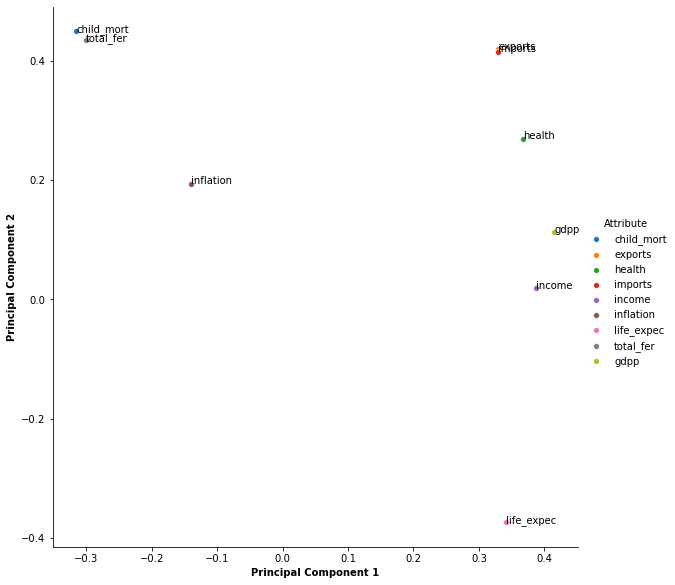

In [82]:
# Plotting the above dataframe for better visualization with PC1 and PC2

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

# Inference:
life expectency, income, gdpp and health are very well explained by PC1.<br>
imports and exports are well explained by both the components PC1 and PC2.<br>
child mortality and total fertility are well explained by PC2.<br>
 

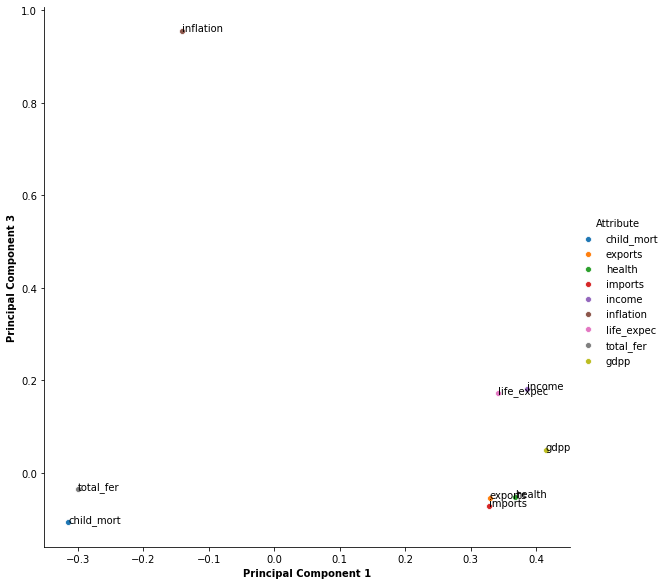

In [83]:
# Plotting the above dataframe with PC1 and PC3 to understand the components which explains inflation.

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

## inflation is well explaind by PC3

In [84]:
# Building the dataframe using Incremental PCA for better efficiency.

inc_pca = IncrementalPCA(n_components=3)

In [85]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(df_scaled)
df_inc_pca

array([[-2.43090013e+00,  1.66564221e+00, -4.32697857e-01],
       [ 7.70550413e-02, -1.25433733e+00, -1.97479976e-01],
       [-3.33809471e-01, -5.70363690e-01,  8.53904870e-01],
       [-2.58915029e+00,  2.18547514e+00,  7.94760567e-01],
       [ 5.16039461e-01, -1.14396459e+00, -3.14922937e-01],
       [ 5.74503683e-02, -6.79516101e-01,  1.38784443e+00],
       [-1.90422740e-01, -1.05218995e+00, -7.77524292e-03],
       [ 3.05959971e+00, -4.42672324e-01,  4.81263196e-02],
       [ 3.29781556e+00, -2.30904863e-01, -7.37487755e-02],
       [-3.90094178e-01, -4.27556796e-01,  5.19385775e-01],
       [ 1.15397954e+00, -7.34762680e-01, -4.85509848e-01],
       [ 1.16550957e+00, -8.03923183e-01,  4.79929626e-01],
       [-8.12368736e-01, -4.30261582e-01, -2.54302975e-01],
       [ 6.27147351e-01, -1.15201960e+00, -4.64197243e-01],
       [ 6.34935526e-03, -9.52803916e-01,  7.41721851e-01],
       [ 3.17118309e+00,  7.95194083e-02, -6.63653968e-02],
       [-3.30663112e-01, -7.78942268e-01

In [86]:
# Creating new dataframe with Principal components

df_pca = pd.DataFrame(df_inc_pca, columns=["PC_1", "PC_2","PC_3"])
data = pd.concat([country, df_pca], axis=1)
data.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.430900,1.665642,-0.432698
1,Albania,0.077055,-1.254337,-0.197480
2,Algeria,-0.333809,-0.570364,0.853905
3,Angola,-2.589150,2.185475,0.794761
4,Antigua and Barbuda,0.516039,-1.143965,-0.314923


# K-MEANS CLUSTERING

In [87]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,1.670000e+02,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,3.479881e+06,4.378205e+05,2.877948e+06,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,1.604850e+07,1.201605e+06,1.298468e+07,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.063997e+01,6.179818e+01,6.432789e+00,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,5.715207e+03,1.214662e+03,8.344850e+03,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,7.978500e+04,1.461362e+04,9.344256e+04,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,1.248926e+06,1.297676e+05,1.253216e+06,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,1.929375e+08,8.566425e+06,1.565550e+08,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Let us implement the K-means algorithm using sci-kit learn.
### n_clusters= 12

In [88]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=12)
#Run the clustering algorithm
model = k_means.fit(X)
model
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X)

## Calculating the silhouette coefficient…

In [89]:
from sklearn import metrics
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.30606498124765086

##  CH score

In [90]:
metrics.calinski_harabasz_score(X, labels)

113.87224312335809

## Let us try this for another randomly chosen value i.e. n_clusters = 8

In [91]:
k_means_8 = KMeans(n_clusters=8)
model = k_means_8.fit(X)
y_hat_8 = k_means_8.predict(X)

## k_means_8 = KMeans(n_clusters=8)


In [92]:
labels_8 = k_means_8.labels_
metrics.silhouette_score(X, labels_8, metric = 'euclidean')

0.3442701413991464

In [93]:
metrics.calinski_harabasz_score(X, labels_8)

112.58608390551113

## An elbow plot shows at what value of k

In [94]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

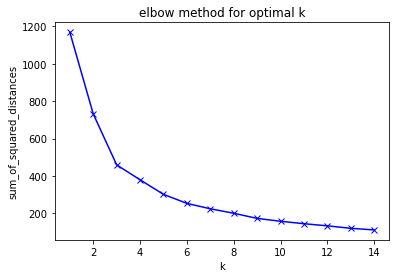

In [95]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

# Observation
## From above graph elbow is at 3 so k=3 

In [110]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [111]:
#K-means with k=3 clusters

cluster3 = KMeans(n_clusters=3, max_iter=50, random_state= 100)
cluster3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [112]:
cluster3.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [113]:
# Assign the label

data['Cluster_Id3'] = cluster3.labels_
data.head()

,country,PC_1,PC_2,PC_3,Cluster_Id3
0,Afghanistan,-2.430900,1.665642,-0.432698,1
1,Albania,0.077055,-1.254337,-0.197480,2
2,Algeria,-0.333809,-0.570364,0.853905,2
3,Angola,-2.589150,2.185475,0.794761,1
4,Antigua and Barbuda,0.516039,-1.143965,-0.314923,2


In [114]:
data.tail()

,country,PC_1,PC_2,PC_3,Cluster_Id3
162,Vanuatu,-1.049480,-0.074106,-0.739963,2
163,Venezuela,-0.291285,-0.118177,3.590117,2
164,Vietnam,-0.438270,-0.848370,0.328641,2
165,Yemen,-1.610752,0.746408,1.167663,1
166,Zambia,-2.459803,1.733769,-0.066657,1


In [115]:
# Number of countries in each cluster

data['Cluster_Id3'].value_counts()

2    93
1    48
0    26
Name: Cluster_Id3, dtype: int64

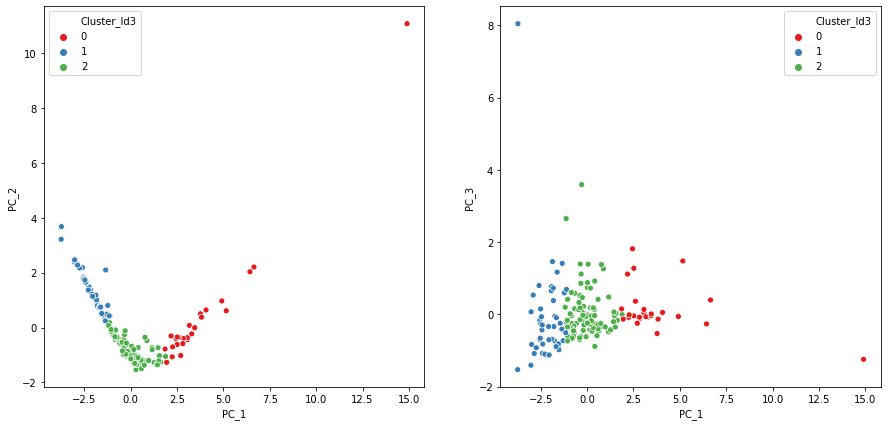

In [116]:
 # Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id3',legend='full',palette="Set1",data=data,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id3',legend='full',palette="Set1",data=data,ax=axes[1])

## intradistance between clusters is not more hence so k=3 is good choice

In [63]:
# Merging the df with PCA with original df

df_merge = pd.merge(df,data,on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id3']]

# Creating df with mean values
cluster_child = pd.DataFrame(df_merge_col.groupby(["Cluster_Id3"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["Cluster_Id3"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["Cluster_Id3"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["Cluster_Id3"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["Cluster_Id3"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["Cluster_Id3"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["Cluster_Id3"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["Cluster_Id3"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["Cluster_Id3"]).gdpp.mean())

df_concat = pd.concat([pd.Series([0,1,2]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
df_concat.columns = ["Cluster_Id3", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPp"]
df_concat.head()

,Cluster_Id3,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPp
0,0,20.564444,3817.841095,3909.099123,516.912227,13789.888889,7.164522,73.371111,2.224889,7664.133333
1,1,91.610417,879.063521,827.028771,114.821765,3897.354167,11.911146,59.239583,4.992083,1909.208333
2,2,4.931034,29429.055172,24439.258621,4291.065517,49482.758621,2.862897,80.548276,1.808621,47710.344828


# OBSERVATIONS
## Cluster 1 has lowest GDPP  
## Cluster 1 has highest child_Mortality, Inflation and Total_fertility  
## Cluster 1 has lowest immports,exports and life_expectancy and income
## so the countries within cluster 1 need fund more than countries of cluster 0 and 2.

In [64]:
df_merge_col.head(10)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id3
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,1145.20,1987.740,267.8950,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,2199.19,1514.370,100.6050,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,1946.70,1648.000,834.3000,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,669.76,1458.660,141.6800,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,24059.70,22418.200,5159.0000,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,3171.12,1208.880,343.3920,16000,13.800,69.1,1.92,5840,0


In [65]:
# Number of countries in each cluster

data['Cluster_Id3'].value_counts()

0    90
1    48
2    29
Name: Cluster_Id3, dtype: int64

In [66]:
# List of countries in Cluster 1

df_merge_col[df_merge_col['Cluster_Id3']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id3
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,2199.1900,1514.370,100.6050,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,180.4040,281.976,31.0780,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,110.4000,170.200,38.7550,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,20.6052,90.552,26.7960,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,290.8200,353.700,67.2030,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,52.6280,118.190,17.7508,888,2.010,47.5,5.21,446,1
32,Chad,150.0,330.0960,390.195,40.6341,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,126.8850,397.573,34.6819,1410,3.870,65.9,4.75,769,1


# Observation
## The above 48 countries is chosen for fund as of now.

# ***

# HIERARCHICAL CLUSTERING

### Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.
#### Two types
#### Agglomerative : This is a "bottom-up" approach.
#### Divisive : This is a "top-down" approach.

In [97]:
# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

####  

In [98]:
data.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.430900,1.665642,-0.432698
1,Albania,0.077055,-1.254337,-0.197480
2,Algeria,-0.333809,-0.570364,0.853905
3,Angola,-2.589150,2.185475,0.794761
4,Antigua and Barbuda,0.516039,-1.143965,-0.314923


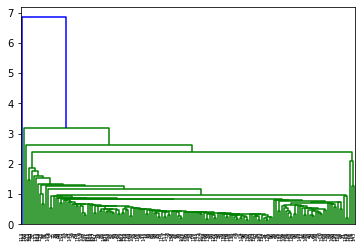

In [117]:
# Single linkage

mergings = linkage(X, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

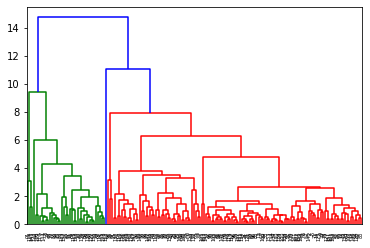

In [118]:
# Complete Linkage

mergings = linkage(X, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [71]:
# df_pca_hierch = data.copy()


In [119]:
df_pca_hierch = data.copy()
df_pca_hierch = df_pca_hierch.drop('Cluster_Id3',axis=1)
df_pca_hierch.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.430900,1.665642,-0.432698
1,Albania,0.077055,-1.254337,-0.197480
2,Algeria,-0.333809,-0.570364,0.853905
3,Angola,-2.589150,2.185475,0.794761
4,Antigua and Barbuda,0.516039,-1.143965,-0.314923


## HECK FOR CUTTING TREE
## find the longest vertical line which should not be cut down by horziental line and then count the number of intersection of that vertical and imaginary horizental line.

In [105]:
 # Let cut the tree at height of approx 8 to get 4 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([df_pca_hierch, clusterCut], axis=1)
df_hc.columns = ['country', 'PC_1', 'PC_2','PC_3','Cluster_Id3']

In [77]:
df_hc.head()

,country,PC_1,PC_2,PC_3,Cluster_Id3,0
0,Afghanistan,-2.637442,1.469038,-0.541359,1,0
1,Albania,-0.022277,-1.431896,-0.020701,0,0
2,Algeria,-0.457626,-0.673301,0.961867,0,0
3,Angola,-2.724520,2.174583,0.606687,1,0
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0,0


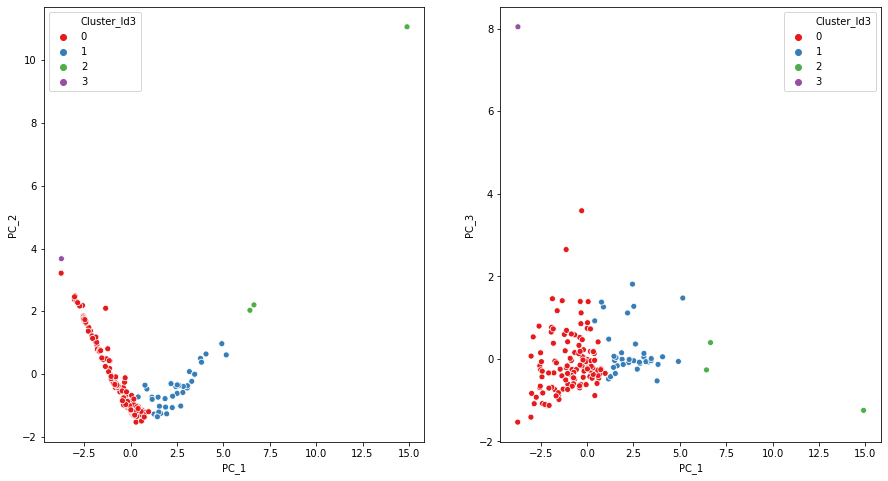

In [107]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id3',legend='full',palette="Set1",data=df_hc,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id3',legend='full',palette="Set1",data=df_hc,ax=axes[1])

## since cluster is well organised i.e they are not far from each other so we will choose no. of cluster=4

In [79]:
# Merging the df with PCA with original df

df_merge_hc = pd.merge(df,df_hc,on='country')
df_merge_col_hc = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id3']]# Merging the df with PCA with original df

df_merge_hc = pd.merge(df,df_hc,on='country')
df_merge_col_hc = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id3']]

In [80]:
df_merge_col_hc.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id3
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,1987.740,267.8950,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,1514.370,100.6050,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,0


In [81]:
 df_merge_col_hc

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id3
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,1987.740,267.8950,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,1514.370,100.6050,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,1565.190,155.9250,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,3847.50,2376.000,662.8500,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,943.20,1050.620,89.6040,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,393.00,450.640,67.8580,4480,23.60,67.5,4.67,1310,1


In [82]:
df_merge_col_hc.tail(20)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id3
147,Tanzania,71.9,131.274,204.282,42.1902,2090,9.25,59.3,5.43,702,1
148,Thailand,14.9,3378.200,3088.640,197.1040,13500,4.08,76.6,1.55,5080,0
149,Timor-Leste,62.6,79.200,1000.800,328.3200,1850,26.50,71.1,6.23,3600,1
150,Togo,90.3,196.176,279.624,37.3320,1210,1.18,58.7,4.87,488,1
151,Tonga,17.4,440.200,2140.650,179.9850,4980,3.68,69.9,3.91,3550,0
152,Tunisia,17.4,2090.700,2289.420,257.0940,10400,3.82,76.9,2.14,4140,0
153,Turkey,19.1,2182.800,2728.500,721.1800,18000,7.01,78.2,2.15,10700,0
154,Turkmenistan,62.0,3387.720,1975.800,111.0000,9940,2.31,67.9,2.83,4440,0
155,Uganda,81.0,101.745,170.170,53.6095,1540,10.60,56.8,6.15,595,1
156,Ukraine,11.7,1398.870,1517.670,229.2840,7820,13.40,70.4,1.44,2970,0


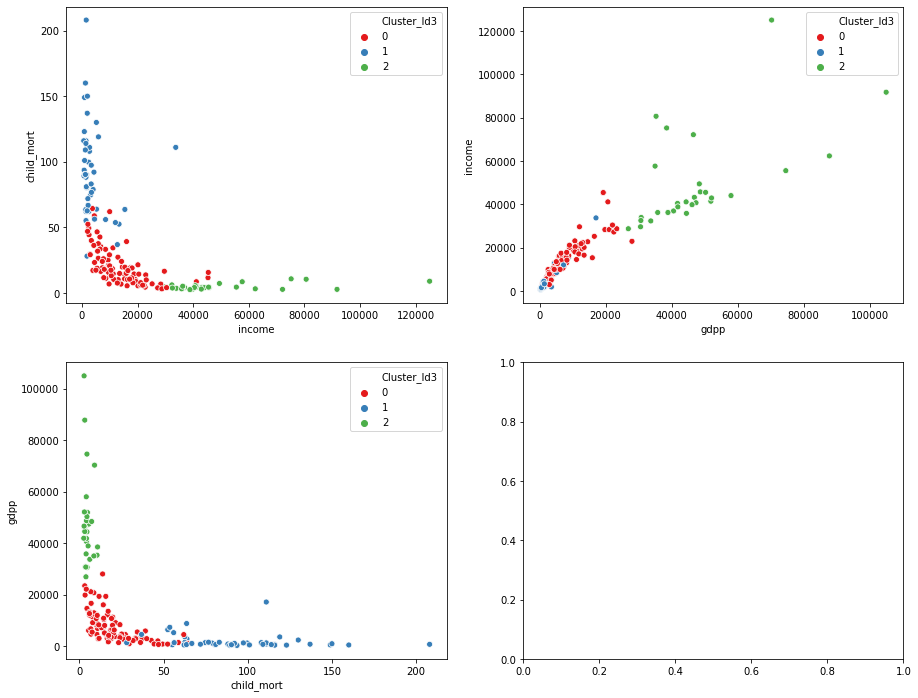

In [83]:
# Scatter plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id3',data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id3', data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id3', data=df_merge_col_hc,legend='full',palette="Set1",ax=axes[1][0])


## From the above graph and the list of countries with respective clustering i came to know that in hierarchical clustering model there is ambiguity ex.. serial no 161 country name=Uzbekistan with 1380 gdpp should lie within cluster 1 instead of cluster 0 because it has almost same gdpp of countries 165 and 166 named Yemen and Zambia with cluster 1 same is the case with 164 Vietnam and many more.


## So I finalise K- Means clustering for choosing the country.

In [84]:
# List of countries in Cluster 1 in K-Means

df_final1=df_merge_col[df_merge_col['Cluster_Id3']==1]
df_final1

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id3
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,2199.1900,1514.370,100.6050,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,180.4040,281.976,31.0780,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,110.4000,170.200,38.7550,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,20.6052,90.552,26.7960,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,290.8200,353.700,67.2030,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,52.6280,118.190,17.7508,888,2.010,47.5,5.21,446,1
32,Chad,150.0,330.0960,390.195,40.6341,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,126.8850,397.573,34.6819,1410,3.870,65.9,4.75,769,1


## Outlier Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x2333e29b780>,
 'caps': [<matplotlib.lines.Line2D at 0x2333d6cd128>,
 'boxes': [<matplotlib.lines.Line2D at 0x2333e29bc18>],
 'medians': [<matplotlib.lines.Line2D at 0x2333e28a780>],
 'fliers': [<matplotlib.lines.Line2D at 0x2333e28a748>],
 'means': []}

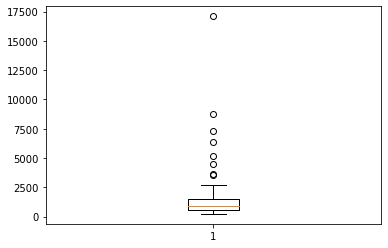

In [85]:
plt.boxplot(df_final1.gdpp)

In [86]:
# we are observing that some of the good(higher gdpp) countries comes to the list so we are going to remove these countries.
df_final2 = df_final1[df_final1['gdpp']<2500]
df_final2.shape

(39, 11)

In [87]:
df_final2

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id3
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.440,56.2,5.82,553,1
17,Benin,111.0,180.4040,281.976,31.0780,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,116.0,110.4000,170.200,38.7550,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,20.6052,90.552,26.7960,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,290.8200,353.700,67.2030,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,52.6280,118.190,17.7508,888,2.010,47.5,5.21,446,1
32,Chad,150.0,330.0960,390.195,40.6341,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,126.8850,397.573,34.6819,1410,3.870,65.9,4.75,769,1
37,"Congo, Dem. Rep.",116.0,137.2740,165.664,26.4194,609,20.800,57.5,6.54,334,1
40,Cote d'Ivoire,111.0,617.3200,528.260,64.6600,2690,5.390,56.3,5.27,1220,1


In [88]:
df_final2.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id3
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,96.871795,224.612026,359.504641,52.168505,2014.692308,10.902692,58.741026,5.111795,835.948718,1.0
std,33.848229,181.809868,271.866669,33.554559,1121.188541,16.487816,6.598832,0.942722,449.179541,0.0
min,28.100000,20.605200,90.552000,12.821200,609.000000,0.885000,32.100000,3.150000,231.000000,1.0
25%,75.700000,101.515500,174.229000,31.512200,1285.000000,3.420000,56.400000,4.605000,485.000000,1.0
50%,90.500000,140.400000,279.624000,42.190200,1660.000000,6.810000,59.300000,5.110000,702.000000,1.0
75%,112.500000,310.828000,416.867000,61.887500,2570.000000,12.200000,62.500000,5.635000,1185.000000,1.0
max,208.000000,635.970000,1190.510000,168.370000,5150.000000,104.000000,68.200000,7.490000,2330.000000,1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2333d59f6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2333d5587f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2333d59fa58>],
 'medians': [<matplotlib.lines.Line2D at 0x2333d558c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x2333d599860>],
 'means': []}

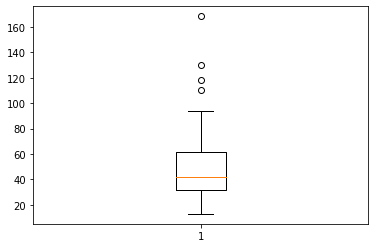

In [89]:
plt.boxplot(df_final2.health)

In [90]:
# we are observing that some of the good health expanding countries comes to the list so we are going to remove these countries.
df_final3 = df_final2[df_final2['health']<100]
df_final3.shape

(35, 11)

In [91]:
df_final3.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id3
count,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,98.785714,196.435971,291.302029,43.08302,1929.514286,8.820714,58.900000,5.204000,752.057143,1.0
std,32.722426,159.905946,153.760429,19.27003,1049.015683,6.326932,6.616112,0.895801,361.488666,0.0
min,55.200000,20.605200,90.552000,12.82120,609.000000,0.885000,32.100000,3.150000,231.000000,1.0
25%,77.800000,91.394500,170.534000,30.66305,1215.000000,3.420000,56.400000,4.710000,470.500000,1.0
50%,90.500000,133.756000,248.508000,40.63410,1540.000000,7.640000,58.800000,5.200000,648.000000,1.0
75%,112.500000,269.910000,393.884000,53.26475,2570.000000,12.200000,63.300000,5.635000,1020.000000,1.0
max,208.000000,617.320000,734.400000,93.53600,4480.000000,23.600000,68.200000,7.490000,1480.000000,1.0


In [92]:
df_final3

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id3
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.440,56.2,5.82,553,1
17,Benin,111.0,180.4040,281.976,31.0780,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,116.0,110.4000,170.200,38.7550,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,20.6052,90.552,26.7960,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,290.8200,353.700,67.2030,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,52.6280,118.190,17.7508,888,2.010,47.5,5.21,446,1
32,Chad,150.0,330.0960,390.195,40.6341,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,126.8850,397.573,34.6819,1410,3.870,65.9,4.75,769,1
37,"Congo, Dem. Rep.",116.0,137.2740,165.664,26.4194,609,20.800,57.5,6.54,334,1
40,Cote d'Ivoire,111.0,617.3200,528.260,64.6600,2690,5.390,56.3,5.27,1220,1


{'whiskers': [<matplotlib.lines.Line2D at 0x2333d21bba8>,
 'caps': [<matplotlib.lines.Line2D at 0x2333d21b5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2333d21b780>],
 'medians': [<matplotlib.lines.Line2D at 0x2333d3a1b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2333d3a1160>],
 'means': []}

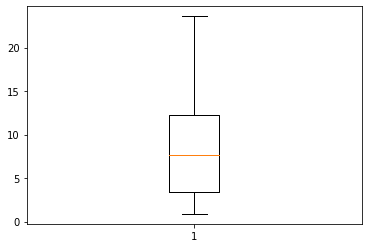

In [93]:
plt.boxplot(df_final3.inflation)

## No outlier no need to remove any data regarding inflation

{'whiskers': [<matplotlib.lines.Line2D at 0x2333cf59898>,
 'caps': [<matplotlib.lines.Line2D at 0x2333d206390>,
 'boxes': [<matplotlib.lines.Line2D at 0x2333cf59780>],
 'medians': [<matplotlib.lines.Line2D at 0x2333d206128>],
 'fliers': [<matplotlib.lines.Line2D at 0x2333d206a20>],
 'means': []}

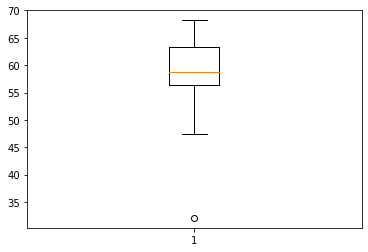

In [94]:
plt.boxplot(df_final3.life_expec)

{'whiskers': [<matplotlib.lines.Line2D at 0x2333d217f60>,
 'caps': [<matplotlib.lines.Line2D at 0x2333d1e56a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2333d1e5160>],
 'medians': [<matplotlib.lines.Line2D at 0x2333e2dd6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2333e2dd630>],
 'means': []}

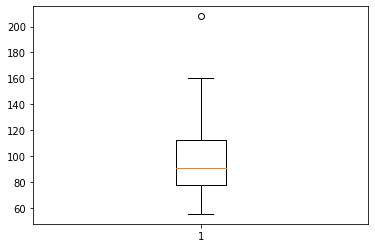

In [95]:
plt.boxplot(df_final3.child_mort)

In [96]:
# we are observing that some of the low inflation countries comes to the list so we are going to remove these countries.
df_final4 = df_final3[df_final3['inflation']<160]
df_final4.shape

(35, 11)

In [97]:
df_final4.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id3
count,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,98.785714,196.435971,291.302029,43.08302,1929.514286,8.820714,58.900000,5.204000,752.057143,1.0
std,32.722426,159.905946,153.760429,19.27003,1049.015683,6.326932,6.616112,0.895801,361.488666,0.0
min,55.200000,20.605200,90.552000,12.82120,609.000000,0.885000,32.100000,3.150000,231.000000,1.0
25%,77.800000,91.394500,170.534000,30.66305,1215.000000,3.420000,56.400000,4.710000,470.500000,1.0
50%,90.500000,133.756000,248.508000,40.63410,1540.000000,7.640000,58.800000,5.200000,648.000000,1.0
75%,112.500000,269.910000,393.884000,53.26475,2570.000000,12.200000,63.300000,5.635000,1020.000000,1.0
max,208.000000,617.320000,734.400000,93.53600,4480.000000,23.600000,68.200000,7.490000,1480.000000,1.0


In [98]:
df_final4['country']

0                   Afghanistan
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
40                Cote d'Ivoire
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
84                          Lao
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
116                    Pakistan
126                      Rwanda
129                     Senegal
132                Sierra Leone
142                       Sudan
147                    Tanzania
150     

In [99]:
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

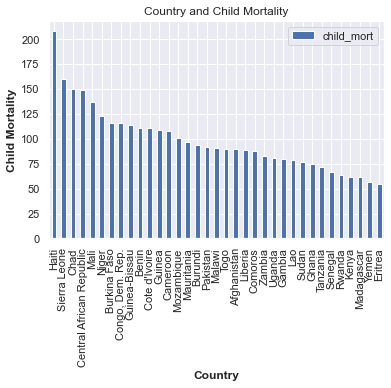

In [100]:
 # BarPlot for Child Mortality of countries which are in need of aid

df_list_cm = pd.DataFrame(df_final4.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

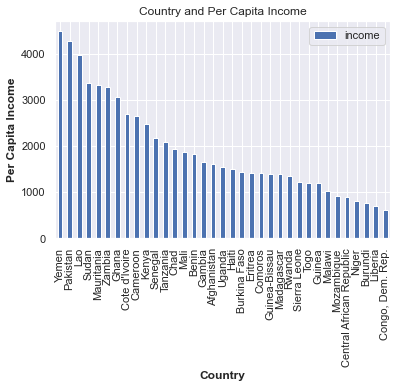

In [101]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_plot1 = pd.DataFrame(df_final4.groupby(['country'])['income'].mean().sort_values(ascending = False))
df_plot1.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

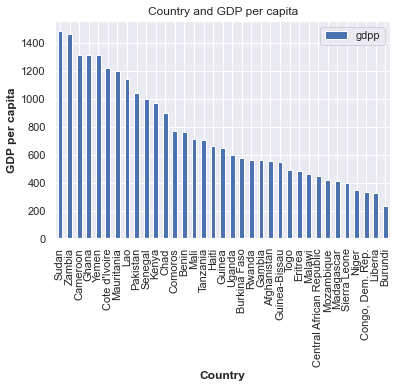

In [102]:
 # BarPlot for Per Capita Income of countries which are in need of aid

df_plot2 = pd.DataFrame(df_final4.groupby(['country'])['gdpp'].mean().sort_values(ascending = False))
df_plot2.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

# Final observation

## I found that the factor such as gdpp, Income and mortality rate play vital role in declearing any  country as developed or underdeveloped. So above using two of the unsupervised clustering model i.e K-Means and Hierarchical clustering I got the names of countries that they have dire need of aid.

In [103]:
df_final4.reset_index(drop=True).country


0                  Afghanistan
1                        Benin
2                 Burkina Faso
3                      Burundi
4                     Cameroon
5     Central African Republic
6                         Chad
7                      Comoros
8             Congo, Dem. Rep.
9                Cote d'Ivoire
10                     Eritrea
11                      Gambia
12                       Ghana
13                      Guinea
14               Guinea-Bissau
15                       Haiti
16                       Kenya
17                         Lao
18                     Liberia
19                  Madagascar
20                      Malawi
21                        Mali
22                  Mauritania
23                  Mozambique
24                       Niger
25                    Pakistan
26                      Rwanda
27                     Senegal
28                Sierra Leone
29                       Sudan
30                    Tanzania
31                        Togo
32      

In [104]:
# with original index
df_final4['country']

0                   Afghanistan
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
40                Cote d'Ivoire
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
84                          Lao
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
116                    Pakistan
126                      Rwanda
129                     Senegal
132                Sierra Leone
142                       Sudan
147                    Tanzania
150     

# Number of country chosen=35